<a href="https://colab.research.google.com/github/LidiiaMelnyk95/FSU_Jena_scripts/blob/main/analysis_of_Ukrainian_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/corpus_data_ukraine_russia_full.csv',sep = ',', skiprows = 0,encoding= 'utf-8', lineterminator='\n', error_bad_lines=False, low_memory= False)


<ipython-input-2-5ff5827df84c>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/content/corpus_data_ukraine_russia_full.csv',sep = ',', skiprows = 0,encoding= 'utf-8', lineterminator='\n', error_bad_lines=False, low_memory= False)


In [ ]:
df = df.drop_duplicates(subset = 'tweetid')

In [ ]:
df = df.drop_duplicates(subset = 'text')


(396992, 32)

In [ ]:
df['tweetcreatedts'] = df['tweetcreatedts'].apply(lambda x: str(x)[:11])
df['tweetcreatedts'].head()

0    2023-04-16 
1    2023-04-16 
2    2023-04-16 
3    2023-04-16 
4    2023-04-16 
Name: tweetcreatedts, dtype: object

***Step 1. Identify language***
Use langdetect to identify if the text is en, ru, uk or other

In [ ]:

from langdetect import detect, LangDetectException

def detect_language(text):
    language = None
    try:
        if len(text) > 3:  # Minimum text length for detection
            language = detect(text)
            return language
    except LangDetectException:
        # Handle exception if language detection fails
        pass


df['language_cld'] = df['text'].apply(lambda x: detect_language(str(x)))

In [ ]:
df['language_cld'].value_counts()

en       250027
uk        45574
et        36793
ru        14687
fr         8056
de         7199
bg         3693
pl         3483
no         3478
fi         3418
ja         3227
tr         2209
it         1764
lt         1232
sl         1198
id          878
mk          867
af          770
sv          540
so          506
hr          489
da          451
ar          434
nl          426
es          416
ro          413
sw          408
ca          407
tl          399
sk          383
cy          340
cs          285
pt          212
th          191
hu          141
sq          118
lv           82
vi           71
fa           30
zh-cn        30
el           20
hi           19
he           16
ko           10
ur            9
zh-tw         2
Name: language_cld, dtype: int64

In [ ]:
df['language'].value_counts()

en     233514
und     67521
uk      52306
ru      18047
fr       7914
ja       3355
pl       2981
de       2533
tr       2060
cs        718
ro        612
in        570
es        536
et        481
ar        480
it        444
ca        379
da        362
bg        280
fi        256
th        186
tl        153
pt        146
ht        143
no        141
nl        131
sv         98
sr         92
zh         79
cy         70
lt         69
lv         57
sl         57
hi         42
hu         33
eu         31
vi         26
el         20
iw         17
fa         17
is         12
ur          8
ko          8
ka          4
bn          1
Name: language, dtype: int64

In [ ]:
df_en = df[(df.language_cld== 'en') | (df.language == 'en')]
df_ukr = df[(df.language_cld== 'uk') | (df.language == 'uk')]
df_rus = df[(df.language_cld== 'ru') | (df.language == 'ru')]

In [ ]:
df_en.shape, df_rus.shape, df_ukr.shape

((256468, 33), (20501, 33), (53932, 33))

In [ ]:
df_total.to_csv('ukr_rus.csv')

***Step 2. Visualise the  distribution of tweets per language***

<ipython-input-16-db43f95ceeea>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ukr['tweetcreatedts'] = pd.to_datetime(df_ukr['tweetcreatedts'])
<ipython-input-16-db43f95ceeea>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rus['tweetcreatedts'] = pd.to_datetime(df_rus['tweetcreatedts'])
<ipython-input-16-db43f95ceeea>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

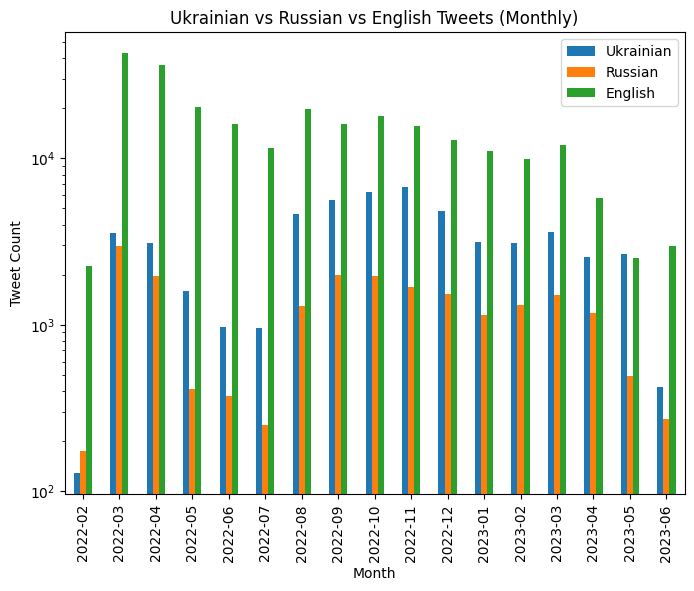

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'tweetcreatedts' column to datetime type
df_ukr['tweetcreatedts'] = pd.to_datetime(df_ukr['tweetcreatedts'])
df_rus['tweetcreatedts'] = pd.to_datetime(df_rus['tweetcreatedts'])
df_en['tweetcreatedts'] = pd.to_datetime(df_en['tweetcreatedts'])


# Group Ukrainian and Russian tweets by month and calculate the counts
ukr_monthly_counts = df_ukr.groupby(df_ukr['tweetcreatedts'].dt.to_period('M')).size()
rus_monthly_counts = df_rus.groupby(df_rus['tweetcreatedts'].dt.to_period('M')).size()
en_monthly_counts = df_en.groupby(df_en['tweetcreatedts'].dt.to_period('M')).size()

# Combine the counts into a single dataframe
combined_counts = pd.DataFrame({'Ukrainian': ukr_monthly_counts, 'Russian': rus_monthly_counts, "English": en_monthly_counts})

# Plot the combined counts as a bar plot
combined_counts.plot(kind='bar', figsize=(8, 6), logy=True)

plt.xlabel('Month')
plt.ylabel('Tweet Count')
plt.title('Ukrainian vs Russian vs English Tweets (Monthly)')
plt.legend()

plt.show()


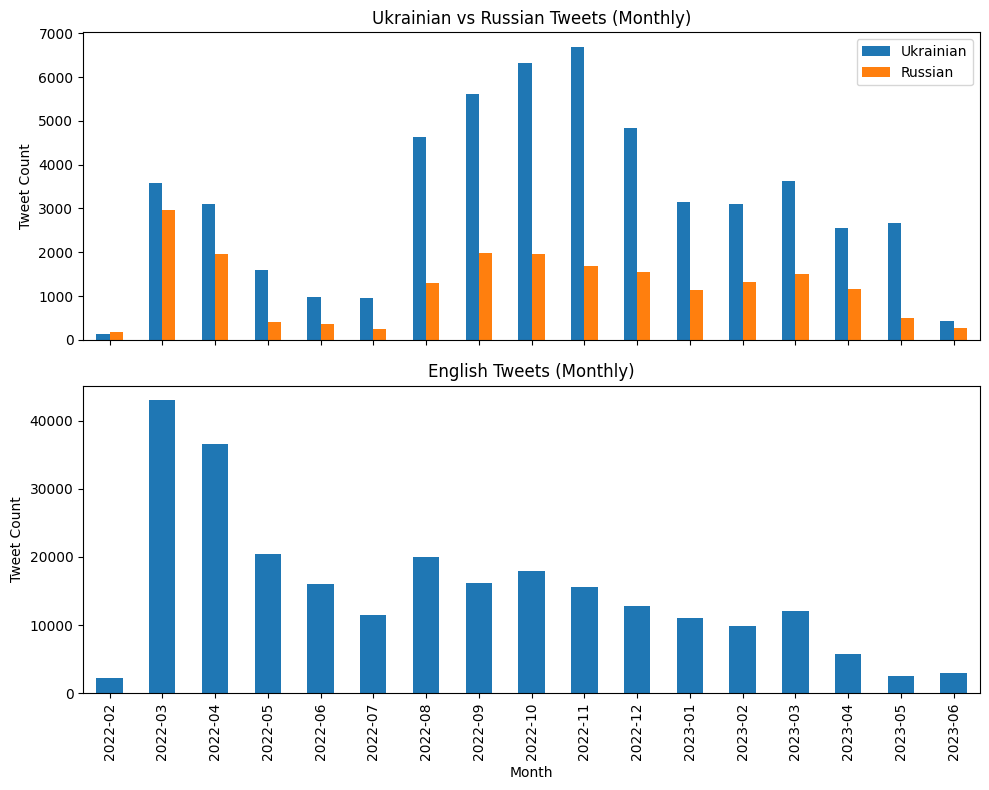

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot Ukrainian and Russian tweets
combined_counts[['Ukrainian', 'Russian']].plot(kind='bar', ax=axes[0])
axes[0].set_ylabel('Tweet Count')
axes[0].set_title('Ukrainian vs Russian Tweets (Monthly)')

# Plot English tweets
combined_counts['English'].plot(kind='bar', ax=axes[1])
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Tweet Count')
axes[1].set_title('English Tweets (Monthly)')

plt.tight_layout()
plt.show()


In [ ]:
!pip install bertopic

In [ ]:
!pip install --upgrade joblib==1.3.1

***Step 3. English language topic modelling***

In [ ]:
#Clean and preprocess tweets
import re
import nltk
def clean_tweet(tweet):
    pattern = r'[0-9]'
    tweet = re.sub(pattern, '', tweet)
    tweet = re.sub(r"@[A-Za-z]+","",tweet)
    tweet = re.sub(r"#[A-Za-z]+","", tweet)
    tweet = re.sub(r"http\S+", "", tweet)
    tweet = re.sub(r"www.\S+", "", tweet)
    tweet = re.sub('[()!?]', ' ', tweet)
    tweet = re.sub('\[.*?\]',' ', tweet)
    return tweet

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from string import punctuation

english_stopwords = stopwords.words("english")
#Preprocess function
def preprocess_text(text):
    tokens = text.split(" ")
    tokens = [token for token in tokens if token.lower() not in english_stopwords]

    text = " ".join(tokens)

    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
pip install simplemma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 MB 11.3 MB/s eta 0:00:00


In [ ]:
#preprocess text, clean and lemmatize it
import simplemma
df_en['clean_text'] = df_en['text'].apply(clean_tweet)
df_en['clean_text'] = df_en['clean_text'].apply(preprocess_text)
df_en['lemmatized'] = df_en['clean_text'].apply(lambda x: ' '.join(simplemma.text_lemmatizer(x, lang = 'en')))

<ipython-input-23-be3a055d9853>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en['clean_text'] = df_en['text'].apply(clean_tweet)
<ipython-input-23-be3a055d9853>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en['clean_text'] = df_en['clean_text'].apply(preprocess_text)
<ipython-input-23-be3a055d9853>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [ ]:
from bertopic import BERTopic
from transformers import AutoModel, AutoTokenizer

#model = AutoModel.from_pretrained("DeepPavlov/distilrubert-base-cased-conversational")


topic_model = BERTopic(n_gram_range=(2, 3), min_topic_size= 75, top_n_words= 5, )

topics, probs = topic_model.fit_transform(list(df_en.lemmatized.values))

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,132667,-1_arm force_force ukraine_war ukraine_arm for...,"[arm force, force ukraine, war ukraine, arm fo...",[currently :. statistic // the oblast alert to...
1,0,9830,0_why horryfing uppow_why horryfing_uppow prep...,"[why horryfing uppow, why horryfing, uppow pre...","[, , ]"
2,1,2982,1_kamikaze drone_ukrainian drone_iranian drone...,"[kamikaze drone, ukrainian drone, iranian dron...","[ukrainian drone drop grenade russian soldier,..."
3,2,2669,2_ukrainian grain_grain export_global food_foo...,"[ukrainian grain, grain export, global food, f...","[as Nov ., harvesting complete Mha , proj . ar..."
4,3,2551,3_eye the war_child eye the_war child eye_chil...,"[eye the war, child eye the, war child eye, ch...","[war child ' s eye the war . victory spring .,..."
...,...,...,...,...,...
359,358,77,358_embassy kyiv_resume work_diplomat return_r...,"[embassy kyiv, resume work, diplomat return, r...",[: staff member embassy Ukraine left territory...
360,359,77,359_machine gun_ak rifle_sniper rifle_release ...,"[machine gun, ak rifle, sniper rifle, release ...","[: troop release video early today , allegedly..."
361,360,76,360_datum clear rivne_clear rivne_clear rivne ...,"[datum clear rivne, clear rivne, clear rivne o...",[clear :: Rivne oblast : whole region Рі вненс...
362,361,75,361_oblast today oblast_oblast oblast_today ob...,"[oblast today oblast, oblast oblast, today obl...","[. city amp ; oblast . if need medical care , ..."


In [ ]:
#get hierarchical topics
from scipy.cluster import hierarchy as sch
linkage_function = lambda x: sch.linkage(x, 'single', optimal_ordering=True)
hierarchical_topics = topic_model.hierarchical_topics(df_en.lemmatized.values, linkage_function=linkage_function)
hierarchical_topics

100%|██████████| 362/362 [01:05<00:00,  5.52it/s]


,Parent_ID,Parent_Name,Topics,Child_Left_ID,Child_Left_Name,Child_Right_ID,Child_Right_Name,Distance
361,724,food animal_raise fund_help raise_fund food_pa...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0,why horryfing uppow_why horryfing_uppow prepay...,723,food animal_raise fund_help raise_fund food_he...,1.000000
360,723,food animal_raise fund_help raise_fund food_he...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",722,food animal_raise fund_help raise_fund food_ra...,98,the mermaid_encode ukrainian mermaid_encode uk...,0.999296
359,722,food animal_raise fund_help raise_fund food_ra...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",368,reason job facing_job facing aggression_job fa...,721,food animal_raise fund_help raise_fund food_he...,0.998922
358,721,food animal_raise fund_help raise_fund food_he...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",720,food animal_raise fund_help raise_fund food_ra...,271,marble run_harry potter_ugears model_hogwarts ...,0.997575
357,720,food animal_raise fund_help raise_fund food_ra...,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",341,buy buy_buy buy buy_plzzzzzz plzzzzzz_plzz buy...,719,food animal_raise fund_help raise_fund food_do...,0.997263
...,...,...,...,...,...,...,...,...
4,367,animal paypal dogandcat_food animal paypal_fun...,"[4, 62, 262]",366,shelter need help_shelter need_our shelter_our...,4,dog cat need_shelter dog cat_cat need help_cat...,0.328309
3,366,shelter need help_shelter need_our shelter_our...,"[62, 262]",62,our shelter need_our shelter_shelter need help...,262,animal shelter need_shelter need help_shelter ...,0.284356
2,365,ukraine ukraine ukraine_ukraine ukraine_ukrain...,"[169, 208]",169,ukraine ukraine ukraine_ukraine ukraine_ukrain...,208,ukraine ukraine_ukraine ukraine ukraine_ukrain...,0.269933
1,364,year telegram_telegram youtube_year telegram y...,"[162, 277]",162,year telegram_telegram youtube band_youtube ba...,277,country album_band country_band country album_...,0.242972


In [ ]:
#merge topics that have 0.7 cos similarity between them
hierarchical_topics_list = []
for element in list(hierarchical_topics[hierarchical_topics['Distance']>0.7]['Topics'].values):
    if element not in hierarchical_topics_list:
        hierarchical_topics_list.append(element)

In [ ]:
len(hierarchical_topics_list)

324

In [ ]:
topic_model.merge_topics(df_en.lemmatized.values,topics_to_merge=hierarchical_topics_list)

In [ ]:
#name the biggest topics
topic_model.set_topic_labels({1:'Mis. experiences', 2:'Animal support', 3:'Ukrainian forces', 4:'Regional alerts',
                              5:'Support Ukraine', 6:'Ukrainian children', 7: 'Russian attacks', 8:'Food crisis',
                              9:'Nuclear power plant', 10:'Stop War', 11: 'Russian oil',12: 'President updates',13: 'Russian missiles',
                              14: 'Intelligence reports', 16:'Military aid', 17:'Oil exports',18: 'Terrorist state', 20:'Explosion', 21: 'Helicopter attacks', 22: 'Nato membership'})

In [ ]:
#visualize topic distribution
topic_model.visualize_barchart(topics = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,20,21,22],top_n_topics=20, n_words = 10,custom_labels=  True, width = 250, height = 200)

In [ ]:
df_en['topics'] = topics

In [ ]:
df_en['tweetcreatedts'] = df_en['tweetcreatedts'].apply(lambda x: str(x)[:11])
topics_over_time = topic_model.topics_over_time(df_en.lemmatized.values, df_en['tweetcreatedts'].values, nr_bins = 22, global_tuning = False)

In [ ]:
topic_model.set_topic_labels({1:'Mis. experiences', 2:'Animal support', 3:'Ukrainian forces', 4:'Regional alerts',
                              5:'Support Ukraine', 6:'Ukrainian children', 7: 'Russian attacks', 8:'Food crisis',
                              9:'Nuclear power plant', 10:'Stop War', 11: 'Russian oil',12: 'President updates',13: 'Russian missiles',
                              14: 'Intelligence reports', 16:'Military aid', 17:'Oil exports',18: 'Terrorist state', 20:'Explosion', 21: 'Helicopter attacks', 22: 'Nato membership'})

In [ ]:
#visualise topics over time (first batch)
topic_model.visualize_topics_over_time(topics_over_time = topics_over_time,  normalize_frequency= False, height = 300, width = 1050, custom_labels= True,topics  = [1,2,3,4,5,])

In [ ]:
#visualise topics over time (second batch)
topic_model.visualize_topics_over_time(topics_over_time = topics_over_time,  normalize_frequency= False, height = 300, width = 1050, custom_labels= True,topics  = [6,7,8,9,10,])

In [ ]:
df_en.to_csv('english_data.csv'), df_ukr.to_csv('ukrainian_data.csv'), df_rus.to_csv('russian_data.csv')
topic_model.save('english_topic_model.pkl')

***Russian topic modelling***

In [ ]:
import pandas as pd
df_rus = pd.read_csv('/content/russian_data.csv')

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from string import punctuation

#Create lemmatizer and stopwords list
russian_stopwords = stopwords.words("russian")
russian_stopwords.append('то')
russian_stopwords.append('что')
russian_stopwords.append('просто')
russian_stopwords.append('да')
russian_stopwords.append('це')
russian_stopwords.append('себе')
russian_stopwords.append('это')
#Preprocess function
def preprocess_text(text):
    tokens = text.split(" ")
    tokens = [token for token in tokens if token.lower() not in russian_stopwords]

    text = " ".join(tokens)

    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df_rus['text_cleaned'] = df_rus['text'].apply(preprocess_text)
df_rus['text_cleaned'] = df_rus['text_cleaned'].apply(clean_tweet)

In [ ]:
!pip install bertopic

In [ ]:
!pip install joblib==1.3.2

In [ ]:
!python -m spacy download ru_core_news_sm

In [ ]:
import spacy
nlp = spacy.load("ru_core_news_sm")

In [ ]:
import spacy
def get_lemmatized_documents(row:str):
    document = nlp(row)
    lemmas = []
    for token in document:
        lemmas.append(token.lemma_)
    return " ".join(lemmas)

df_rus['lemmatized'] = df_rus['text_cleaned'].apply(get_lemmatized_documents)
df_rus= df_rus.dropna(subset = 'lemmatized')

In [ ]:
df_rus.lemmatized

0                                                _ pro тре
1         \n как днепре работать общественный транспорт...
2         \n пасха : традиция главный запрет день \n\n ...
3         \n ночь пасхой мирный : ситуация безопасность...
4                             _ вітаю   Скоро быть вдома 🤗
                               ...                        
20496    пожар тюмень . такой , рузкие    | 🇺 🇦 ..   vi...
20497    житель комсомольск - на - амур поджёг здание р...
20498    кюблер - росс проводить наблюдение рф … \n\n ....
20499    Из - за российский обстрел загореться всехсвят...
20500    боец полок имя кастуся калиновского наградить ...
Name: lemmatized, Length: 20501, dtype: object

In [ ]:
from bertopic import BERTopic
from transformers import AutoModel
import torch

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the BERT model on the GPU
model = AutoModel.from_pretrained("DeepPavlov/distilrubert-base-cased-conversational").to(device)

# Instantiate BERTopic with GPU support
topic_model = BERTopic(embedding_model=model, language='russian', n_gram_range=(2, 3), min_topic_size=10, calculate_probabilities=True, verbose=False)
topic_model.fit_transform(df_rus.lemmatized.values)


In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,9301,-1_via войнасукраиной_via войнасукраиной росси...,"[via войнасукраиной, via войнасукраиной россия...",[брифинг алексей арестович . -ый день | 🇺 🇦 .....
1,0,675,0_читать днепр_днепропетровский область_знак з...,"[читать днепр, днепропетровский область, знак ...",[ \n как пройти ночь апрель днепропетровский...
2,1,543,1_dok да_dok тот_dok что_dok ну,"[dok да, dok тот, dok что, dok ну, пан доктор,...","[_ dok что, _ dok что 😏, _ dok тот]"
3,2,459,2_россиясмотреть вторжениероссия_войнасукраино...,"[россиясмотреть вторжениероссия, войнасукраино...",[і rhcp висловилися підтримку україни 🇺 🇦 ❤ ️ ...
4,3,452,3_прикурить хоботок_прикурить хоботок сk_теж х...,"[прикурить хоботок, прикурить хоботок сk, теж ...","[⚡ ️в белгород сообщать очередной "" хлопке "" н..."
...,...,...,...,...,...
201,200,10,200_вторжениероссия обстрел_россиясмотреть вто...,"[вторжениероссия обстрел, россиясмотреть вторж...","[командир каравай легион "" свобода россия "" об..."
202,201,10,201_мекнув питать_мекнув питать мекнув_питать ...,"[мекнув питать, мекнув питать мекнув, питать м...","[мекнув . питать, мекнув . питать ., мекнув , ..."
203,202,10,202_русский мир_мир русский мир_русский мир ру...,"[русский мир, мир русский мир, русский мир рус...","["" русский мир "" весь красе . охтирка . сумськ..."
204,203,10,203_ag танцевать_пацан сказать_танцевать робот...,"[ag танцевать, пацан сказать, танцевать робот ...","[ самое мочь сказать золотой орда 🤝, _ lini..."


In [ ]:
topic_model.visualize_barchart(top_n_topics= 20)

In [ ]:
topics_dict

In [ ]:
hierarchical_topics = topic_model.hierarchical_topics(df_rus.lemmatized.values)

100%|██████████| 204/204 [00:03<00:00, 66.03it/s]


In [ ]:
from scipy.cluster import hierarchy as sch
linkage_function = lambda x: sch.linkage(x, 'single', optimal_ordering=True)
hierarchical_topics = topic_model.hierarchical_topics(df_rus.lemmatized.values, linkage_function=linkage_function)


100%|██████████| 185/185 [00:04<00:00, 38.76it/s]


In [ ]:
#since topics are smaller, we increase min distance for merging the hierarchical topics
hierarchical_topics_list_russian = []
for element in list(hierarchical_topics[hierarchical_topics['Distance']>0.85]['Topics'].values):
    if element not in hierarchical_topics_list_russian:
        hierarchical_topics_list_russian.append(element)

In [ ]:
topic_model.merge_topics(df_rus['text_cleaned'].values, hierarchical_topics_list_russian)

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,9752,-1_россиясмотри вторжениероссии_войнасукраиной...,"[россиясмотри вторжениероссии, войнасукраиной ...",[Кладбище Чернигове. прихода РУССКОГО МИРА | 🇺...
1,0,2339,0_войнасукраиной россиясмотри вторжениероссии_...,"[войнасукраиной россиясмотри вторжениероссии, ...",[ #стихи #поэт #стихотворенние #перевод #стих...
2,1,918,1_херсон боже__vapouriser _matveev_боже херсон...,"[херсон боже, _vapouriser _matveev, боже херсо...","[#Херсон #Херсону #херсонской , #Херсон #Хер..."
3,2,671,2__dok да__dok та__dok шо__dok ну,"[_dok да, _dok та, _dok шо, _dok ну, _dok дада...","[_dok Да,, вообще странно, _dok Та да, вывод ..."
4,3,437,3_дякую пане_дякую дуже_дуже дякую_ага _dok,"[дякую пане, дякую дуже, дуже дякую, ага _dok,...","[_gordon Кого ""его"" \nНе стеснять свои ощущени..."
...,...,...,...,...,...
65,64,25,64_вашей страны__katz ваш_ответственность дейс...,"[вашей страны, _katz ваш, ответственность дейс...",[_katz неужели должны хотя иметь совесть нес...
66,65,23,65_новости украина__g украинцев_слов буча добр...,"[новости украина, _g украинцев, слов буча добр...",[🇺🇦 Вознесенске украинцы выгнали своего двора ...
67,66,20,66_русский мир_генерал майор_акция предлагаем ...,"[русский мир, генерал майор, акция предлагаем ...","[_russia Акция, предлагаем сдаться, сможете вы..."
68,67,18,67__bes загадаю_їду подруги їсти_їсти ясо_нелю...,"[_bes загадаю, їду подруги їсти, їсти ясо, нел...","[_M_ намагалась, невийшло🥲, _bes Загадаю НГ ..."


In [ ]:
topic_model.set_topic_labels(topics_dict)

In [ ]:
topics_dict = {0: 'War with Ukraine', 1: "Kherson", 7:"Bakhmut", 10: 'Mariupol', 12: "Russian Attacks", 13: "Air Alarms", 14: 'No Losses', 15: 'Intelligence Reports', 16: 'Ukrainian Advances', 22: 'Anti-Russian sentiment', 24: 'True information', 26: 'Threats', 29: 'Russian occupation', 32: 'Russian news', 36: "Nazism" }
topic_model.set_topic_labels(topics_dict)
topic_model.visualize_barchart( topics = topics_dict.keys(), custom_labels = True, width= 400)


In [ ]:
topic_model.get_representative_docs(36)

['никита #орлов выжил... 🤣🤣🤣🤣\n\n#груз #своихнебросаем #мненестыдно #денацификация #потерьнет #дерусификация #рашизм   #фашизм #русскийфашизм #нацизм #русскийнацизм #спецоперация #армияроссии #росгвардия #российскаяармия     #спецоперация ',
 'андрей #моряков понял... 😂😂😂😂\n\n#груз #своихнебросаем #мненестыдно #денацификация #потерьнет #дерусификация #рашизм   #фашизм #русскийфашизм #нацизм #русскийнацизм #спецоперация #армияроссии #росгвардия #российскаяармия     ',
 'н̶а̶ц̶и̶з̶м митяй #ломакин уничтожен. 🤣🤣🤣\n\n#груз #своихнебросаем #мненестыдно #денацификация #потерьнет #дерусификация #рашизм   #фашизм #русскийфашизм #нацизм #русскийнацизм #спецоперация #армияроссии #росгвардия #российскаяармия     ']

In [ ]:
df_rus['tweetcreatedts'] = df_rus['tweetcreatedts'].apply(lambda x: str(x)[:11])
topics_over_time = topic_model.topics_over_time(df_rus.lemmatized.values, df_rus['tweetcreatedts'].values, nr_bins = 22, global_tuning = False)
topics_over_time = topic_model.topics_over_time(df_rus.lemmatized.values, df_rus['tweetcreatedts'].values)
topic_model.visualize_topics_over_time(topics_over_time = topics_over_time,  topics = list(topics_dict.keys())[:8], normalize_frequency= False, height = 300, width = 1050, custom_labels= True,)

In [ ]:
topic_model.visualize_topics_over_time(topics_over_time = topics_over_time,  topics = list(topics_dict.keys())[8:], normalize_frequency= False, height = 300, width = 1050, custom_labels= True)

***Topic modelling of the Ukrainian tweets***

In [ ]:
#clean tweet function
import re
def clean_tweet(tweet):
    pattern = r'[0-9]'
    tweet = re.sub(pattern, '', tweet)
    tweet = re.sub(r"@[A-Za-z]+","",tweet)
    tweet = re.sub(r"#[A-Za-z]+","", tweet)
    tweet = re.sub(r"http\S+", "", tweet)
    tweet = re.sub(r"www.\S+", "", tweet)
    return tweet

In [ ]:
ukrainian_stopwords = ['а', 'аби', 'абиде', 'абиким', 'абикого', 'абиколи', 'абикому', 'абикуди', 'абихто', 'абичий', 'абичийого', 'абичийому', 'абичим', 'абичию', 'абичия', 'абичиє', 'абичиєму', 'абичиєю', 'абичиєї', 'абичиї', 'абичиїй', 'абичиїм', 'абичиїми', 'абичиїх', 'абичого', 'абичому', 'абищо', 'абияка', 'абияке', 'абиякий', 'абияким', 'абиякими', 'абияких', 'абиякого', 'абиякому', 'абиякою', 'абиякої', 'абияку', 'абиякі', 'абиякій', 'абиякім', 'або', 'абощо', 'авжеж', 'авось', 'ага', 'ад', 'адже', 'аж', 'ажень', 'аз', 'ай', 'але', 'ало', 'амінь', 'ант', 'ану', 'ані', 'аніде', 'аніж', 'анізащо', 'аніким', 'анікого', 'анікогісінько', 'аніколи', 'анікому', 'аніскільки', 'аніхто', 'анічим', 'анічого', 'анічогісінько', 'анічому', 'аніщо', 'аніяка', 'аніяке', 'аніякий', 'аніяким', 'аніякими', 'аніяких', 'аніякого', 'аніякому', 'аніякою', 'аніякої', 'аніяку', 'аніякі', 'аніякій', 'аніякім', 'аніякісенька', 'аніякісеньке', 'аніякісенький', 'аніякісеньким', 'аніякісенькими', 'аніякісеньких', 'аніякісенького', 'аніякісенькому', 'аніякісенькою', 'аніякісенької', 'аніякісеньку', 'аніякісенькі', 'аніякісенькій', 'аніякісенькім', 'аніякісінька', 'аніякісіньке', 'аніякісінький', 'аніякісіньким', 'аніякісінькими', 'аніякісіньких', 'аніякісінького', 'аніякісінькому', 'аніякісінькою', 'аніякісінької', 'аніякісіньку', 'аніякісінькі', 'аніякісінькій', 'аніякісінькім', 'ат', 'ато', 'атож', 'ау', 'ах', 'ач', 'ачей', 'аякже', 'б', 'ба', 'багато', 'багатьма', 'багатьом', 'багатьох', 'баз', 'бай', 'бат', 'бах', 'бац', 'баш', 'бе', 'беж', 'без', 'безперервно', 'бел', 'бер', 'би', 'бир', 'бич', 'близько', 'близько від', 'бо', 'бов', 'бод', 'бодай', 'боз', 'бош', 'був', 'буває', 'буде', 'будем', 'будемо', 'будете', 'будеш', 'буду', 'будуть', 'будь', 'будь ласка', 'будьмо', 'будьте', 'була', 'були', 'було', 'бути', 'бух', 'буц', 'буцім', 'буцімто', 'бі', 'біб', 'більш', 'більше', 'біля', 'в', 'в бік', 'в залежності від', 'в міру', 'в напрямі до', 'в порівнянні з', 'в процесі', 'в результаті', 'в ролі', 'в силу', 'в сторону', 'в супроводі', 'в ході', "в ім'я", 'в інтересах', 'вад', 'важлива', 'важливе', 'важливий', 'важливі', 'вак', 'вам', 'вами', 'ван', 'вас', 'ват', 'ваш', 'ваша', 'ваше', 'вашим', 'вашими', 'ваших', 'вашого', 'вашому', 'вашою', 'вашої', 'вашу', 'ваші', 'вашій', 'вашім', 'ввесь', 'вві', 'вгору', 'вдалині', 'вед', 'верх', 'весь', 'вех', 'вже', 'вздовж', 'ви', 'виз', 'вис', 'височині', 'вище ', 'вйо', 'власне', 'властиво', 'вміти', 'внаслідок', 'вниз', 'внизу', 'во', 'вон', 'вона', 'вони', 'воно', 'восьмий', 'вперед', 'вподовж', 'впоперек', 'впритиск', 'впритул', 'впродовж', 'впрост', 'все', 'всередині', 'всею', 'вслід', 'всупереч', 'всього', 'всьому', 'всю', 'всюди', 'вся', 'всяк', 'всяка', 'всяке', 'всякий', 'всяким', 'всякими', 'всяких', 'всякого', 'всякому', 'всякою', 'всякої', 'всяку', 'всякі', 'всякій', 'всякім', 'всі', 'всій', 'всіляка', 'всіляке', 'всілякий', 'всіляким', 'всілякими', 'всіляких', 'всілякого', 'всілякому', 'всілякою', 'всілякої', 'всіляку', 'всілякі', 'всілякій', 'всілякім', 'всім', 'всіма', 'всіх', 'всією', 'всієї', 'втім', 'ві', 'віг', 'від', 'від імені', 'віддалік від', 'відколи', 'відносно', 'відповідно', 'відповідно до', 'відсотків', 'відтепер', 'відтоді', 'він', 'вісім', 'вісімнадцятий', 'вісімнадцять', 'віт', 'віф', 'віх', 'віц', 'віщо', 'віщось', 'г', 'га', 'гав', 'гаразд', 'ге', 'гез', 'гем', 'геп', 'гет', 'геть', 'гех', 'ги', 'гик', 'гир', 'гич', 'гм', 'го', 'говорив', 'гог', 'гоп', 'гоц', 'гу', 'гуп', 'д', 'да', 'давай', 'давати', 'давно', 'далеко', 'далеко від', 'далі', 'даром', 'два', 'двадцятий', 'двадцять', 'дванадцятий', 'дванадцять', 'двох', 'дві', 'де', "дев'ятий", "дев'ятнадцятий", "дев'ятнадцять", "дев'ять", 'дедалі', 'деким', 'декого', 'деколи', 'декому', 'декотра', 'декотре', 'декотрий', 'декотрим', 'декотрими', 'декотрих', 'декотрого', 'декотрому', 'декотрою', 'декотрої', 'декотру', 'декотрі', 'декотрій', 'декотрім', 'декілька', 'декільком', 'декількома', 'декількох', 'декім', 'десь', 'десятий', 'десять', 'дехто', 'дечий', 'дечийого', 'дечийому', 'дечим', 'дечию', 'дечия', 'дечиє', 'дечиєму', 'дечиєю', 'дечиєї', 'дечиї', 'дечиїй', 'дечиїм', 'дечиїми', 'дечиїх', 'дечого', 'дечому', 'дечім', 'дещо', 'деяка', 'деяке', 'деякий', 'деяким', 'деякими', 'деяких', 'деякого', 'деякому', 'деякою', 'деякої', 'деяку', 'деякі', 'деякій', 'деякім', 'деінде', 'для', 'до', 'добре', 'довго', 'довкола', 'довкіл', 'дог', 'доки', 'допоки', 'допіру', 'досить', 'досі', 'дотепер', 'доти', 'другий', 'друго', 'дуже', 'дякую', 'дійсно', 'діл', 'е', 'еге', 'еж', 'ей', 'ерг', 'ест', 'ет', 'ех', 'еч', 'ж', 'же', 'жоден', 'жодна', 'жодне', 'жодний', 'жодним', 'жодними', 'жодних', 'жодного', 'жодному', 'жодною', 'жодної', 'жодну', 'жодні', 'жодній', 'жоднім', 'жоднісінька', 'жоднісіньке', 'жоднісінький', 'жоднісіньким', 'жоднісінькими', 'жоднісіньких', 'жоднісінького', 'жоднісінькому', 'жоднісінькою', 'жоднісінької', 'жоднісіньку', 'жоднісінькі', 'жоднісінькій', 'жоднісінькім', 'жуз', 'з', 'з метою', 'з нагоди', 'з приводу', 'з розрахунку на', 'з-за', 'з-над', 'з-перед', 'з-поза', 'з-поміж', 'з-понад', 'з-поперед', 'з-посеред', 'з-проміж', 'з-під', 'з-серед', 'за', 'за винятком', 'за допомогою', 'за посередництвом', 'за рахунок', 'завгодно', 'завдяки', 'завжди', 'завше', 'задля', 'зазвичай', 'зайнята', 'зайнятий', 'зайнято', 'зайняті', 'залежно', 'залежно від', 'замість', 'занадто', 'заради', 'зараз', 'зас', 'зате', 'збоку', 'збоку від', 'зважаючи на', 'зверх ', 'зверху', 'звичайно', 'звиш', 'звідки', 'звідкилясь', 'звідкись', 'звідкіль', 'звідкіля', 'звідкілясь', 'звідси', 'звідсіль', 'звідсіля', 'звідти', 'звідтіль', 'звідтіля', 'звідусюди', 'звідусіль', 'звідціля', 'згідно з', 'здається', 'здовж', 'зем', 'зет', 'ззаду', 'зиз', 'зик', 'значить', 'знову', 'зо', 'зовсім', 'зсередини', 'зух', 'зі', 'зіс', 'и', 'ич', 'й', 'ймовірно', 'йно', 'йо', 'його', 'йой', 'йол', 'йому', 'йор', 'йот', 'йох', 'к', 'каже', 'каз', 'кар', 'каф', 'ках', 'ке', 'кед', 'кет', 'кеш', 'кив', 'кий', 'кил', 'ким', 'кимось', 'кимсь', 'ких', 'киш', 'коб', 'коби', 'кого', 'когось', 'кожен', 'кожна', 'кожне', 'кожний', 'кожним', 'кожними', 'кожних', 'кожного', 'кожному', 'кожною', 'кожної', 'кожну', 'кожні', 'кожній', 'кожнім', 'кожнісінька', 'кожнісіньке', 'кожнісінький', 'кожнісіньким', 'кожнісінькими', 'кожнісіньких', 'кожнісінького', 'кожнісінькому', 'кожнісінькою', 'кожнісінької', 'кожнісіньку', 'кожнісінькі', 'кожнісінькій', 'кожнісінькім', 'коли', 'колись', 'коло', 'кому', 'комусь', 'котра', 'котрась', 'котре', 'котресь', 'котрий', 'котрийсь', 'котрим', 'котрими', 'котримись', 'котримось', 'котримсь', 'котрих', 'котрихось', 'котрихсь', 'котрого', 'котрогось', 'котрому', 'котромусь', 'котрою', 'котроюсь', 'котрої', 'котроїсь', 'котру', 'котрусь', 'котрі', 'котрій', 'котрійсь', 'котрім', 'котрімсь', 'котрісь', 'коц', 'коч', 'коштом', 'край', 'краще', 'кру', 'круг', 'кругом', 'крю', 'кря', 'крізь', 'крім', 'куди', 'кудись', 'кудою', 'кілька', 'кільком', 'кількома', 'кількох', 'кім', 'кімось', 'кімсь', 'кінець', 'л', 'лаж', 'лап', 'лас', 'лат', 'ле', 'ледве', 'ледь', 'лет', 'лиш', 'лише', 'лишень', 'лум', 'луп', 'лут', 'льє', 'люди', 'людина', 'ля', 'лі', 'ліворуч від', 'лік', 'лім', 'м', 'мабуть', 'майже', 'мало', 'мати', 'мац', 'ме', 'меж', 'мене', 'менше', 'мені', 'мерсі', 'мет', 'мжа', 'ми', 'мимо ', 'миру', 'мит', 'мною', 'мо', 'мов', 'мовби', 'мовбито', 'могла', 'могли', 'могло', 'мого', 'могти', 'мож', 'може', 'можем', 'можемо', 'можете', 'можеш', 'можна', 'можу', 'можуть', 'можіть', 'мой', 'мол', 'мою', 'моя', 'моє', 'моєму', 'моєю', 'моєї', 'мої', 'моїй', 'моїм', 'моїми', 'моїх', 'му', 'мі', 'міг', 'між', 'мій', 'мільйонів', 'н', 'на', 'на адресу', 'на базі', 'на благо', 'на випадок', 'на відміну від', 'на засадах', 'на знак', 'на зразок', 'на користь', 'на кшталт', 'на межі', 'на основі', 'на противагу', 'на підставі', 'на честь', 'на чолі', 'на ґрунті', 'навколо', 'навкруг', 'навкруги ', 'навкіл', 'навпаки', 'навперейми', 'навпроти', 'навіть', 'навіщо', 'навіщось', 'нагорі', 'над', 'надо', 'надовкола', 'надокола', 'наді', 'назавжди', 'назад', 'назустріч', 'най', 'найбільш', 'нам', 'нами', 'наоколо ', 'наокруг ', 'наокруги ', 'наокіл', 'наперед', 'напередодні', 'напереді', 'наперекір', 'напереріз', 'наприкінці', 'напроти', 'нарешті', 'нарівні з', 'нас', 'насеред', 'насподі', 'наспід', 'настрічу', 'насупроти', 'насупротив ', 'нате', 'наче', 'начеб', 'начебто', 'наш', 'наша', 'наше', 'нашим', 'нашими', 'наших', 'нашого', 'нашому', 'нашою', 'нашої', 'нашу', 'наші', 'нашій', 'нашім', 'не', 'не до', 'не можна', 'неабичим', 'неабичого', 'неабичому', 'неабищо', 'небагато', 'небагатьма', 'небагатьом', 'небагатьох', 'небудь', 'невважаючи', 'невже', 'недалеко', 'недалеко від', 'неж', 'незалежно від', 'незважаючи', 'незважаючи на', 'ней', 'немає', 'немов', 'немовби', 'немовбито', 'неначе', 'неначебто', 'неподалеку', 'неподалеку від', 'неподалечку', 'неподалечку від', 'неподалік', 'неподалік від', 'нерідко', 'нех', 'нехай', 'нещодавно', 'нею', 'неї', 'нижче', 'низько', 'ник', 'ним', 'ними', 'них', 'нич', 'но', 'ну', 'нуг', 'нуд', 'нум', 'нумо', 'нумте', 'ньо', 'нього', 'ньому', 'ню', 'нюх', 'ня', 'няв', 'ні', 'ніби', 'ніби-то', 'нібито', 'ніде', 'ніж', 'нізащо', 'нізвідки', 'нізвідкіля', 'ній', 'ніким', 'нікого', 'нікогісінько', 'ніколи', 'нікому', 'нікотра', 'нікотре', 'нікотрий', 'нікотрим', 'нікотрими', 'нікотрих', 'нікотрого', 'нікотрому', 'нікотрою', 'нікотрої', 'нікотру', 'нікотрі', 'нікотрій', 'нікотрім', 'нікуди', 'нім', 'нінащо', 'ніскільки', 'ніт', 'ніхто', 'нічий', 'нічийна', 'нічийне', 'нічийний', 'нічийним', 'нічийними', 'нічийних', 'нічийного', 'нічийному', 'нічийною', 'нічийної', 'нічийну', 'нічийні', 'нічийній', 'нічийнім', 'нічийого', 'нічийому', 'нічим', 'нічию', 'нічия', 'нічиє', 'нічиєму', 'нічиєю', 'нічиєї', 'нічиї', 'нічиїй', 'нічиїм', 'нічиїми', 'нічиїх', 'нічого', 'нічому', 'ніщо', 'ніяк', 'ніяка', 'ніяке', 'ніякий', 'ніяким', 'ніякими', 'ніяких', 'ніякого', 'ніякому', 'ніякою', 'ніякої', 'ніяку', 'ніякі', 'ніякій', 'ніякім', 'ніякісінька', 'ніякісіньке', 'ніякісінький', 'ніякісіньким', 'ніякісінькими', 'ніякісіньких', 'ніякісінького', 'ніякісінькому', 'ніякісінькою', 'ніякісінької', 'ніякісіньку', 'ніякісінькі', 'ніякісінькій', 'ніякісінькім', 'о', 'об', 'обабіч', 'обаполи', 'обидва', 'обр', 'обік', 'обіруч', 'обіч', 'ов', 'од', 'один', 'одинадцятий', 'одинадцять', 'одна', 'однак', 'одначе', 'одне', 'одним', 'одними', 'одних', 'одно', 'одного', 'одного разу', 'одному', 'одною', 'одної', 'одну', 'одні', 'одній', 'однім', 'однією', 'однієї', 'ож', 'ой', 'окрай', 'окроме', 'округ', 'округи', 'окрім', 'окіл', 'ом', 'он', 'онде', 'онно', 'оно', 'оподаль', 'оподаль від', 'оподалік', 'оподалік від', 'опостін', 'опостінь', 'опроче', 'опріч', 'опріче', 'опісля', 'осе', 'оскільки', 'особливо', 'осторонь', 'ось', 'осісьо', 'от', 'ота', 'отак', 'отака', 'отаке', 'отакий', 'отаким', 'отакими', 'отаких', 'отакого', 'отакому', 'отакою', 'отакої', 'отаку', 'отакі', 'отакій', 'отакім', 'отакісінька', 'отакісіньке', 'отакісінький', 'отакісіньким', 'отакісінькими', 'отакісіньких', 'отакісінького', 'отакісінькому', 'отакісінькою', 'отакісінької', 'отакісіньку', 'отакісінькі', 'отакісінькій', 'отакісінькім', 'отам', 'оте', 'отже', 'отим', 'отими', 'отих', 'ото', 'отого', 'отож', 'отой', 'отому', 'отою', 'отої', 'отсе', 'оттак', 'отто', 'оту', 'отут', 'оті', 'отій', 'отім', 'отією', 'отієї', 'ох', 'оце', 'оцей', 'оцим', 'оцими', 'оцих', 'оцього', 'оцьому', 'оцю', 'оця', 'оці', 'оцій', 'оцім', 'оцією', 'оцієї', 'п', "п'я", "п'ятий", "п'ятнадцятий", "п'ятнадцять", "п'ять", 'па', 'пад', 'пак', 'пек', 'перед', 'передо', 'переді', 'перетака', 'перетаке', 'перетакий', 'перетаким', 'перетакими', 'перетаких', 'перетакого', 'перетакому', 'перетакою', 'перетакої', 'перетаку', 'перетакі', 'перетакій', 'перетакім', 'перший', 'пиж', 'плі', 'по', 'поблизу', 'побік', 'побіля', 'побіч', 'поверх', 'повз', 'повздовж', 'повинно', 'повище', 'повсюди', 'повсюдно', 'подаль від', 'подалі від', 'подекуди', 'подеяка', 'подеяке', 'подеякий', 'подеяким', 'подеякими', 'подеяких', 'подеякого', 'подеякому', 'подеякою', 'подеякої', 'подеяку', 'подеякі', 'подеякій', 'подеякім', 'подовж', 'подібно до', 'поз', 'поза', 'позад', 'позаду', 'позата', 'позате', 'позатим', 'позатими', 'позатих', 'позатого', 'позатой', 'позатому', 'позатою', 'позатої', 'позату', 'позаті', 'позатій', 'позатім', 'позатією', 'позатієї', 'позаяк', 'поздовж', 'поки', 'покрай', 'покіль', 'помежи', 'помимо', 'поміж', 'помість', 'понад', 'понадо', 'понаді', 'понижче', 'пообіч', 'поодаль від', 'поодалік від', 'поперед', 'попереду', 'поперек', 'попліч', 'попри', 'попросту', 'попід', 'пора', 'поруч', 'поряд', 'поряд з', 'порівняно з', 'посеред', 'посередині', 'потрібно', 'потім', 'поуз', 'початку', 'почерез', 'праворуч від', 'пред', 'предо', 'преді', 'прекрасно', 'прецінь', 'при', 'притому', 'причому', 'причім', 'про', 'проз', 'промеж', 'проміж', 'просто', 'проте', 'проти', 'против', 'противно', 'протягом', 'пря', 'пріч', 'пхе', 'пху', 'пі', 'пів', 'півперек', 'під', 'під знаком', 'під приводом', 'під час', 'підо', 'пізніше', 'пім', 'пір', 'після', 'р', 'ради', 'раз', 'разом з', 'разу', 'рано', 'раніш', 'раніш від', 'раніше', 'раніше від', 'раптом', 'ре', 'рет', 'риж', 'рим', 'рип', 'роб', 'року', 'років', 'рос', 'рох', 'році', 'рус', 'рух', 'руч', 'рік', 'с', 'саж', 'саз', 'сак', 'сам', 'сама', 'саме', 'сами', 'самий', 'самим', 'самими', 'самих', 'само', 'самого', 'самому', 'самою', 'самої', 'саму', 'самі', 'самій', 'самім', 'сап', 'сас', 'свого', 'свою', 'своя', 'своє', 'своєму', 'своєю', 'своєї', 'свої', 'своїй', 'своїм', 'своїми', 'своїх', 'свій', 'се', 'себе', 'себто', 'сей', 'сен', 'серед', 'середи', 'середу', 'сеч', 'си', 'сив', 'сиг', 'сиз', 'сик', 'сиріч', 'сих', 'сказав', 'сказала', 'сказати', 'скрізь', 'скільки', 'скільки-то', 'скількись', 'скільком', 'скількома', 'скількомась', 'скількомось', 'скількомсь', 'скількох', 'скількохось', 'скількохсь', 'сли', 'слідом за', 'соб', 'собою', 'собі', 'соп', 'спасибі', 'спереду', 'спочатку', 'справ', 'справді', 'став', 'стосовно', 'стільки', 'стільком', 'стількома', 'стількох', 'су', 'судячи з', 'супроти', 'супротив', 'суть', 'суч', 'суш', 'сьогодні', 'сьомий', 'сюди', 'ся', 'сяг', 'сяк', 'сяка', 'сяке', 'сякий', 'сяким', 'сякими', 'сяких', 'сякого', 'сякому', 'сякою', 'сякої', 'сяку', 'сякі', 'сякій', 'сякім', 'сям', 'сі', 'сім', 'сімнадцятий', 'сімнадцять', 'сіп', 'т', 'та', 'таж', 'так', 'така', 'таке', 'такенна', 'такенне', 'такенний', 'такенним', 'такенними', 'такенних', 'такенного', 'такенному', 'такенною', 'такенної', 'такенну', 'такенні', 'такенній', 'такеннім', 'таки', 'такий', 'таким', 'такими', 'таких', 'такого', 'також', 'такому', 'такою', 'такої', 'таку', 'такі', 'такій', 'такім', 'такісінька', 'такісіньке', 'такісінький', 'такісіньким', 'такісінькими', 'такісіньких', 'такісінького', 'такісінькому', 'такісінькою', 'такісінької', 'такісіньку', 'такісінькі', 'такісінькій', 'такісінькім', 'тал', 'там', 'тамки', 'тамта', 'тамте', 'тамтим', 'тамтими', 'тамтих', 'тамтого', 'тамтой', 'тамтому', 'тамтою', 'тамтої', 'тамту', 'тамті', 'тамтій', 'тамтім', 'тамтією', 'тамтієї', 'тар', 'тат', 'таш', 'тва', 'твого', 'твою', 'твоя', 'твоє', 'твоєму', 'твоєю', 'твоєї', 'твої', 'твоїй', 'твоїм', 'твоїми', 'твоїх', 'твій', 'те', 'тебе', 'тег', 'теж', 'тем', 'тепер', 'теперечки', 'тес', 'теф', 'теє', 'ти', 'тик', 'тил', 'тим', 'тими', 'тисяч', 'тих', 'то', 'тобою', 'тобто', 'тобі', 'того', 'тоді', 'тож', 'той', 'тол', 'тому', 'тому що', 'тот', 'тощо', 'тою', 'тої', 'тра', 'тре', 'треба', 'третій', 'три', 'тринадцятий', 'тринадцять', 'трохи', 'тс', 'тсс', 'ту', 'туди', 'тудою', 'туп', 'тут', 'тутеньки', 'тутечки', 'тутки', 'туф', 'туц', 'тю', 'тюг', 'тюп', 'тяг', 'тяж', 'тям', 'тяп', 'ті', 'тій', 'тільки', 'тім', 'тією', 'у', 'у бік', 'у вигляді', 'у випадку', 'у відповідності до', 'у відповідь на', 'у залежності від', "у зв'язку з", 'у міру', 'у напрямі до', 'у порівнянні з', 'у процесі', 'у результаті', 'у ролі', 'у силу', 'у сторону', 'у супроводі', 'у ході', 'ув', 'увесь', 'уві', 'угу', 'уже', 'узбіч', 'уздовж', 'укр', 'ум', 'унаслідок', 'униз', 'унизу', 'унт', 'уперед', 'уподовж', 'упоперек', 'упритиск до', 'упритул до', 'упродовж', 'упрост', 'ус', 'усе', 'усередині', 'услід', 'услід за', 'усупереч', 'усього', 'усьому', 'усю', 'усюди', 'уся', 'усяк', 'усяка', 'усяке', 'усякий', 'усяким', 'усякими', 'усяких', 'усякого', 'усякому', 'усякою', 'усякої', 'усяку', 'усякі', 'усякій', 'усякім', 'усі', 'усій', 'усіляка', 'усіляке', 'усілякий', 'усіляким', 'усілякими', 'усіляких', 'усілякого', 'усілякому', 'усілякою', 'усілякої', 'усіляку', 'усілякі', 'усілякій', 'усілякім', 'усім', 'усіма', 'усіх', 'усією', 'усієї', 'утім', 'ух', 'ф', "ф'ю", 'фа', 'фаг', 'фай', 'фат', 'фе', 'фед', 'фез', 'фес', 'фет', 'фзн', 'фоб', 'фот', 'фра', 'фру', 'фу', 'фук', 'фур', 'фус', 'фіш', 'х', 'ха', 'хаз', 'хай', 'хап', 'хат', 'хащ', 'хе', 'хет', 'хи', 'хиб', 'хм', 'хо', 'хов', 'хол', 'хон', 'хоп', 'хор', 'хотіти', 'хоч', 'хоча', 'хочеш', 'хро', 'хрю', 'хто', 'хтось', 'ху', 'хуз', 'хук', 'хух', 'хху', 'хіба', 'ц', 'це', 'цебто', 'цей', 'цеп', 'ци', 'цим', 'цими', 'цир', 'цих', 'цло', 'цоб', 'цок', 'цоп', 'цор', 'цс', 'цсс', 'цуг', 'цур', 'цуц', 'цього', 'цьому', 'цю', 'цюк', 'ця', 'цяв', 'цяп', 'ці', 'цід', 'цій', 'цім', 'ціною', 'цією', 'цієї', 'ч', 'чал', 'чар', 'час', 'часто', 'частіше', 'часу', 'чах', 'чей', 'чень', 'через', 'четвертий', 'чи', 'чий', 'чийого', 'чийогось', 'чийому', 'чийомусь', 'чийсь', 'чик', 'чим', 'чимось', 'чимсь', 'чир', 'численна', 'численне', 'численний', 'численним', 'численними', 'численних', 'численні', 'чию', 'чиюсь', 'чия', 'чиясь', 'чиє', 'чиєму', 'чиємусь', 'чиєсь', 'чиєю', 'чиєюсь', 'чиєї', 'чиєїсь', 'чиї', 'чиїй', 'чиїйсь', 'чиїм', 'чиїми', 'чиїмись', 'чиїмось', 'чиїмсь', 'чиїсь', 'чиїх', 'чиїхось', 'чиїхсь', 'чля', 'чого', 'чогось', 'чом', 'чому', 'чомусь', 'чон', 'чоп', 'чортзна', 'чос', 'чотири', 'чотирнадцятий', 'чотирнадцять', 'чу', 'чум', 'чур', 'чш', 'чім', 'чімось', 'чімсь', 'чіт', 'ш', 'ша', 'шаг', 'шал', 'шам', 'шво', 'шед', 'шен', 'шиз', 'шир', 'шляхом', 'шостий', 'шістнадцятий', 'шістнадцять', 'шість', 'щ', 'ще', 'щем', 'щеп', 'щип', 'щир', 'що', 'щоб', 'щоби', 'щодо', 'щойно', 'щоправда', 'щось', 'щі', 'ь', 'ю', 'юз', 'юн', 'юнь', 'юс', 'ют', 'юхт', 'я', 'яв', 'яд', 'яз', 'язь', 'як', 'яка', 'якась', 'якби', 'яке', 'якесь', 'який', 'якийсь', 'яким', 'якими', 'якимись', 'якимось', 'якимсь', 'яких', 'якихось', 'якихсь', 'якого', 'якогось', 'якому', 'якомусь', 'якось', 'якою', 'якоюсь', 'якої', 'якоїсь', 'якраз', 'яку', 'якусь', 'якщо', 'які', 'якій', 'якійсь', 'якім', 'якімсь', 'якісь', 'ял', 'ям', 'ян', 'янь', 'яо', 'яп', 'ярл', 'ясь', 'ять', 'є', 'єр', 'єси', 'і', 'ібн', 'ід', 'із', 'із-за', 'із-під', 'іззаду', 'ізм', 'ізсередини', 'ік', 'ікс', 'ікт', "ім'я", 'імовірно', 'інакша', 'інакше', 'інакший', 'інакшим', 'інакшими', 'інакших', 'інакшого', 'інакшому', 'інакшою', 'інакшої', 'інакшу', 'інакші', 'інакшій', 'інакшім', 'інколи', 'іноді', 'інша', 'інше', 'інший', 'іншим', 'іншими', 'інших', 'іншого', 'іншому', 'іншою', 'іншої', 'іншу', 'інші', 'іншій', 'іншім', 'інь', 'іч', 'іще', 'ї', 'їдь', 'їй', 'їм', 'їх', 'їхнього', 'їхньому', 'їхньою', 'їхньої', 'їхню', 'їхня', 'їхнє', 'їхні', 'їхній', 'їхнім', 'їхніми', 'їхніх', 'її', 'ґ']

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from string import punctuation

#Create lemmatizer and stopwords list
ukrainian_stopwords.extend('то')
ukrainian_stopwords.extend("цей")
ukrainian_stopwords.extend('просто')
ukrainian_stopwords.extend('да')
ukrainian_stopwords.extend('це')
ukrainian_stopwords.extend('себе')
ukrainian_stopwords.extend('що')
ukrainian_stopwords.extend('ще')
ukrainian_stopwords.extend('це')
ukrainian_stopwords.extend('щоб')
ukrainian_stopwords.extend('http')
ukrainian_stopwords.extend('https')
ukrainian_stopwords.extend('co')
#Preprocess function
def preprocess_text(text):
    tokens = text.split(" ")
    tokens = [token for token in tokens if token.lower() not in ukrainian_stopwords]

    text = " ".join(tokens)

    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pandas as pd
df_ukr = pd.read_csv('/content/ukrainian_data.csv')
df_ukr['clean_tweet'] = df_ukr['text'].apply(lambda x: clean_tweet(x))
df_ukr['clean_tweet'] = df_ukr['clean_tweet'].apply(preprocess_text)

<ipython-input-72-bad3984a414d>:2: DtypeWarning:

Columns (18,25) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
df_ukr.clean_tweet

0        дні голові питання: трагедій пережити Україні,...
1        Дихання першому місці. сон, їжа, фізичні вправ...
2          їсти вареники швидкість https://t.co/nfu81CrRpM
3                             @kolia_48_ Воістину воскрес!
4                        @Pashak1436 Да, красунчик, дякую🥰
                               ...                        
53927    Автоспортивний світ починається автомобільного...
53928    допомогу фонду «Україна ти», зроблену свердлов...
53929    261 дитяче життя, забрали російські окупанти з...
53930    дитина почуватися захищеною знати, загрожує, 🇷...
53931    Бойцы полка имени Кастуся Калиновского награжд...
Name: clean_tweet, Length: 53932, dtype: object

In [ ]:
import simplemma
df_ukr['lemmatized'] = df_ukr['clean_tweet'].apply(lambda x: ' '.join(simplemma.text_lemmatizer(x, lang = 'uk')))

In [ ]:
pip install simplemma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 MB 5.8 MB/s eta 0:00:00


In [ ]:
#get ukrainian topic model
from bertopic import BERTopic
from transformers import AutoModel

sentence_model = AutoModel.from_pretrained("ukr-models/xlm-roberta-base-uk")
topic_model_ukr = BERTopic(embedding_model=sentence_model, language = 'ukrainian', n_gram_range=(1, 3), min_topic_size= 10,  )
topics, probs = topic_model_ukr.fit_transform(df_ukr.lemmatized.values, )

Some weights of XLMRobertaModel were not initialized from the model checkpoint at ukr-models/xlm-roberta-base-uk and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
topic_model_ukr.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,28890,-1_україна_ви_ти_день,"[україна, ви, ти, день, війна, український, зс...","[йти в . о !, вимагати повернути українець чол..."
1,0,3008,0_це_цікаво_цей_центр,"[це, цікаво, цей, центр, цивільний, цікавий, ц...","[_attica це , це ?, це правда !, цікаво]"
2,1,1848,1_життя_жити_жінка_живий,"[життя, жити, жінка, живий, жи, жи ти, жах, ти...","[живий ., о , життя ,, життя́]"
3,2,1494,2_рф_телефон_вторжениероссии_войнасукраиной,"[рф, телефон, вторжениероссии, войнасукраиной,...","[злочин , вчинений період повномасштабний втор..."
4,3,1462,3_шо_шось_шукати_шкода,"[шо, шось, шукати, шкода, швидко, штука, школа...","[шо ви ?, шо там ?, шо там ?]"
...,...,...,...,...,...
307,306,10,306__redfox_приготування напій_ятаю твіт_кен р...,"[_redfox, приготування напій, ятаю твіт, кен р...","[поміняти кен реплай , знести попередній твіт,..."
308,307,10,307_їсти ср ли_ли відео_ср ли відео_летіти йоб...,"[їсти ср ли, ли відео, ср ли відео, летіти йоб...","[хотіти котик , вставати ліжко бо вулиця, "" де..."
309,308,10,308_купе_купити тімотішаламекоїн_придністров в...,"[купе, купити тімотішаламекоїн, придністров ви...","[окей купе чоловіків i get it , купе дівча ?, ..."
310,309,10,309_інтернет_ефір_непофесіональний погляд шоуб...,"[інтернет, ефір, непофесіональний погляд шоубі...",[сьогодні обирати фіналісто Нацвідбор Євробаче...


In [ ]:
topic_model_ukr.visualize_barchart()

In [ ]:
from scipy.cluster import hierarchy as sch
from bertopic import BERTopic

# Hierarchical topics
linkage_function = lambda x: sch.linkage(x, 'ward', optimal_ordering=True)
hierarchical_topics_ukr = topic_model_ukr.hierarchical_topics(df_ukr.text.values, linkage_function=linkage_function)

100%|██████████| 310/310 [00:06<00:00, 46.45it/s]


In [ ]:
topic_model_ukr.visualize_hierarchy(hierarchical_topics=hierarchical_topics_ukr)


In [ ]:
#get hierarchical topics
hierarchical_topics_list = []
for element in list(hierarchical_topics_ukr[hierarchical_topics_ukr['Distance']>0.75]['Topics'].values):
    if element not in hierarchical_topics_list:
        hierarchical_topics_list.append(element)
topic_model_ukr.merge_topics(df_ukr.clean_tweet.values, hierarchical_topics_list)

In [ ]:
topic_model_ukr.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,28890,-1_україна_україни_зсу_україні,"[україна, україни, зсу, україні, так, день, ук...",[Воїни -ї ОМБр спалили танк ТБВ рашистів Бахму...
1,0,5706,0_це_життя_цікаво_жити,"[це, життя, цікаво, жити, людей, грошей, украї...",[_Shmyhal Випустіть людей вижити зиму. Заборо...
2,1,2471,1_россиясмотри_войнасукраиной_войнасукраиной р...,"[россиясмотри, войнасукраиной, войнасукраиной ...",[Дехтяренко БУЧУ | 🇺🇦 .. via \n\n#войнасукра...
3,2,1906,2_завтра_знаю_зробити_зсу,"[завтра, знаю, зробити, зсу, здається, так, зр...","[ зробили?🧐, Зробила , _E Володя путін _E зда..."
4,3,1741,3_шо_газ_украина зеленский путин_нефть санкции,"[шо, газ, украина зеленский путин, нефть санкц...",[DANONE ВЫСТАВИЛА ПРОДАЖУ БИЗНЕС РОССИИ\nПОДРО...
...,...,...,...,...,...
127,126,23,126_звісно_миколаїв_зізнавався донатив сьогодн...,"[звісно, миколаїв, зізнавався донатив сьогодні...","[ Звісно, Зізнавався донатив сьогодні?\n\n #ЗС..."
128,127,23,127_подав_обстрілів терористами_подав новини_п...,"[подав, обстрілів терористами, подав новини, п...","[ подав подав, новини освітлювали, дитина заги..."
129,128,23,128_бачив_бачила_бачу_зерно спосіб,"[бачив, бачила, бачу, зерно спосіб, знаю вчили...","[ речі бачив топ зе віледж, потрапляв 🚬🚬🚬, _re..."
130,129,22,129_ні_об_ні ні_об єкт,"[ні, об, ні ні, об єкт, єкт, ні ні ні, військо...","[Військовий об'єкт? \nНі, приватний будинок.\n..."


In [ ]:
topic_info_df = topic_model_ukr.get_topic_info()


In [ ]:
topic_names = {0: 'Border policy', 1: 'Russian invasion', 3: 'Sanctions', 47: 'Ukr. identity', 5: 'Ukrainian forces', 9: 'Mobilisation in Russia', 12: 'Air alert', 13: 'Emotions', 15: 'Opening borders', 40: 'Good russians', 18: 'Azov and Mariupol', 19: 'Light over Darkness', 20: 'Stop the occupation', 22: 'Football', 28: 'Support for Ukraine', 31: 'Cybersport', 32: 'Bakhmut', 44: 'Ukr. Independence', 36: 'Speak Ukr.Lang', 39: 'Patriotic exclamations'  }
topic_model_ukr.set_topic_labels(topic_names)
topic_model_ukr.visualize_barchart(topics = topic_names.keys(),top_n_topics=20, n_words = 10,custom_labels=  True, width = 350, height = 200)

In [ ]:
df_ukr['topics'] = topics_1

In [ ]:
df_ukr['tweetcreatedts'] = df_ukr['tweetcreatedts'].apply(lambda x: str(x)[:11])
topics_over_time = topic_model_ukr.topics_over_time(df_ukr.lemmatized.values, df_ukr['tweetcreatedts'].values, nr_bins = 15, global_tuning = False)

In [ ]:
topic_model_ukr.visualize_topics_over_time(topics_over_time=topics_over_time, topics=list(topic_names.keys())[:10],custom_labels=True)

In [ ]:
topic_model_ukr.visualize_topics_over_time(topics_over_time=topics_over_time, topics=list(topic_names.keys())[10:],custom_labels=True)